## Observations and Insights 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#study_results.head()
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_data.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice.
mice = len(combined_data["Mouse ID"].value_counts())
mice_count = pd.DataFrame([mice], columns = ["Total Mice"])
mice_count.head()

,Total Mice
0,249


In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [83]:
# Optional: Get all the data for the duplicate mouse


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its
mice_drop= combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mice_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(mice_drop["Mouse ID"].value_counts())
clean_mice_count

249

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#find each regimen name
regimen_type = mice_drop["Drug Regimen"].unique()
regimen_type
# This method is the most straighforward, creating multiple series and putting them all together at the end.

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [87]:
#mice_drop.describe(include= 'all')

In [88]:
#create pivot table to generate statistics
stats_pivot = mice_drop.pivot_table(index = 'Drug Regimen', values = 'Tumor Volume (mm3)', aggfunc=['mean', 'sem', 'median', 'var', "std", "count"]).round(2)
stats_pivot.head()

,mean,sem,median,var,std,count
,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,,
Capomulin,40.68,0.33,41.56,24.95,4.99,230
Ceftamin,52.59,0.47,51.78,39.29,6.27,178
Infubinol,52.88,0.49,51.82,43.13,6.57,178
Ketapril,55.24,0.60,53.70,68.55,8.28,188
Naftisol,54.33,0.60,52.51,66.17,8.13,186


## Bar and Pie Charts

In [89]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [90]:
#count mice for each Regimen
mice_pivot=mice_drop.pivot_table(index= 'Drug Regimen', values= 'Mouse ID', aggfunc= 'count')
mice_pivot


,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'Count')

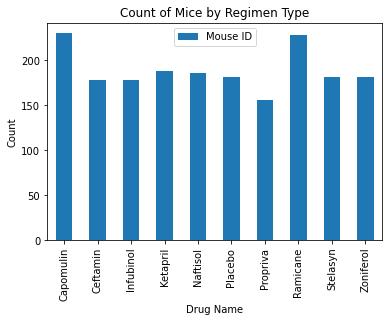

In [91]:
#create bar chart with pivot info
mice_pivot.plot(kind='bar')

plt.title("Count of Mice by Regimen Type")
plt.xlabel("Drug Name")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

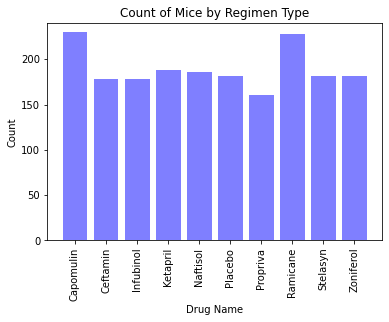

In [92]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
users= [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='b', alpha=0.5, align='center')
tick = [value for value in x_axis]
plt.xticks(tick, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')

#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+10)
plt.title("Count of Mice by Regimen Type")
plt.xlabel("Drug Name")
plt.ylabel("Count")

In [93]:
#pivot table to count female vs male mice
gender_pivot = mice_drop.pivot_table(index='Sex', values='Mouse ID', aggfunc='count')
gender_pivot

,Mouse ID
Sex,
Female,930
Male,958


In [94]:
#groupby to find mice by sex
gender_groups=mice_drop.groupby("Sex").count()
gender_groups

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


In [95]:
#create chart labels for male and female
gender_labels = [mice_drop["Sex"].unique()]
gender_labels_list= list(gender_groups.index)
gender_labels_list

['Female', 'Male']

In [96]:
#create sizes for chart
sizes= [gender_groups["Mouse ID"]]
sizes

[Sex
 Female    930
 Male      958
 Name: Mouse ID, dtype: int64]

In [97]:
#create color scheme
colors = ["purple", "red"]


C:\Users\cthee\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

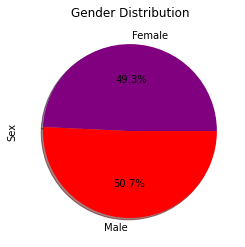

In [98]:
#create chart and label using pandas
plt.pie(sizes, labels=gender_labels_list, colors=colors, autopct="%1.1f%%", shadow=True)
plt.ylabel('Sex')
plt.title('Gender Distribution')
plt.show


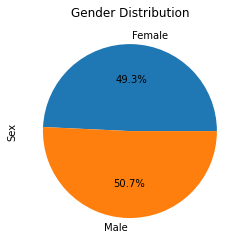

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_py= gender_groups["Mouse ID"].plot.pie(y='sizes', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#pull info for each regimen
capo = mice_drop.loc[mice_drop["Drug Regimen"] == "Capomulin",:]
rami = mice_drop.loc[mice_drop["Drug Regimen"] == "Ramicane",:]
infu = mice_drop.loc[mice_drop["Drug Regimen"] == "Infubinol",:]
ceft = mice_drop.loc[mice_drop["Drug Regimen"] == "Ceftamin",:]


# Start by getting the last (greatest) timepoint for each mouse

In [101]:
last_capo= capo.groupby('Mouse ID').max()['Timepoint']
last_capo_df=pd.DataFrame(last_capo)
capo_merge= pd.merge(last_capo_df, mice_drop, on=("Mouse ID","Timepoint"),how="left")
capo_merge[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].head()
#last_capo_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,b128,45,38.982878
1,b742,45,38.939633
2,f966,20,30.485985
3,g288,45,37.074024
4,g316,45,40.159220


In [102]:
last_rami=rami.groupby('Mouse ID').max()['Timepoint']
last_rami_df=pd.DataFrame(last_rami)
rami_merge= pd.merge(last_rami_df, mice_drop, on=("Mouse ID","Timepoint"),how="left")
rami_merge[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].head()
#last_rami_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a411,45,38.407618
1,a444,45,43.047543
2,a520,45,38.810366
3,a644,45,32.978522
4,c458,30,38.342008


In [103]:
last_infu=infu.groupby('Mouse ID').max()['Timepoint']
last_infu_df=pd.DataFrame(last_infu)
infu_merge= pd.merge(last_infu_df, mice_drop, on=("Mouse ID","Timepoint"),how="left")
infu_merge[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].head()
#last_infu_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a577,30,57.031862
3,a685,45,66.083066
4,c139,45,72.226731


In [104]:
last_ceft=ceft.groupby('Mouse ID').max()['Timepoint']
last_ceft_df=pd.DataFrame(last_ceft)
ceft_merge= pd.merge(last_ceft_df, mice_drop, on=("Mouse ID","Timepoint"),how="left")
ceft_merge[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].head()
#last_ceft_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a275,45,62.999356
1,b447,0,45.000000
2,b487,25,56.057749
3,b759,30,55.742829
4,f436,15,48.722078


In [105]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [106]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [108]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo=capo.reset_index(drop=True)
one_capo=capo.loc[capo["Mouse ID"] == "i557",:]
one_capo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
216,i557,Capomulin,Female,1,24,0,45.000000,0
217,i557,Capomulin,Female,1,24,5,42.261665,0
218,i557,Capomulin,Female,1,24,10,42.992077,0
219,i557,Capomulin,Female,1,24,15,43.529876,0
220,i557,Capomulin,Female,1,24,20,43.967895,0


<function matplotlib.pyplot.show(*args, **kw)>

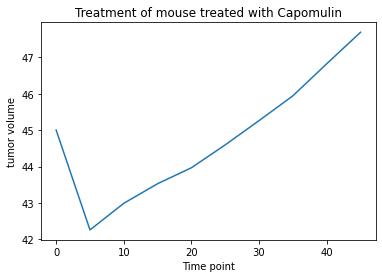

In [109]:
x_ax= one_capo["Timepoint"]
y_ax= one_capo["Tumor Volume (mm3)"]

plt.xlabel("Time point")
plt.ylabel("tumor volume")
plt.title("Treatment of mouse treated with Capomulin")
plt.plot(x_ax, y_ax)
plt.show

In [110]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#create data frame with weight and avegerage tumor volume
avg_tumor_capo=pd.DataFrame(capo.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

avg_tumor_capo

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


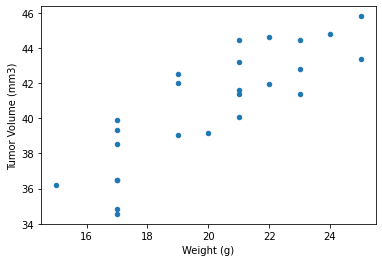

In [111]:
#plot info from data frame
avg_tumor_capo.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [112]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen
correlation= round(st.pearsonr(avg_tumor_capo["Weight (g)"], avg_tumor_capo["Tumor Volume (mm3)"])[0],2)
                         
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


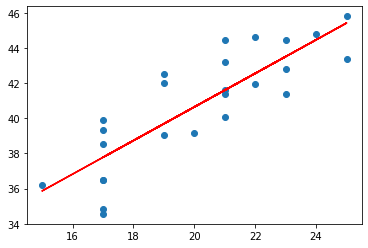

In [113]:
# create line of regression for the weight and average tumor volume for the Capomulin regimen
x_values= avg_tumor_capo["Weight (g)"]
y_values= avg_tumor_capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
#plt.annotate(line_eq, (6, 10). )
plt.show()